

---






![picture](https://i.ibb.co/j4jy5TF/Advanced-analytics-Employee-Attrition-1200-630.jpg)



---




# A. Objective:

* To understand Employee Attrition
* To predict the employees who are likely leave the company in the future

# B. Data Description:

Data Source : [Kaggle](https://www.kaggle.com/dineshsagar66/hr-analytics-people-management)

The data has 14999 rows & 10 columns.

**Feature Details** :

1. **satisfaction_level**: Employee satisfaction level score between 0 and 1

2. **last_evaluation**: Last evaluation score given to the employee

3. **number_project**: Number of projects worked on per year

4. **average_monthly_hours**: Average monthly working hours

5. **time_spend_company**: Time spent in the company in years

6. **work_accident**: Whether they have had a work accident in the last 2 years

7. **promotion_last_5years**: Whether they have had a promotion in the last 5 years

8. **department**: Department the employee is working in

9. **salary**: Salary of the employee (low, medium, high)

10. **left**: Whether the employee has left or is still working

# C. Importing Required Libraries & data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# importing the data
emp = pd.read_csv('employee.csv')

# D. Exploratory Data Analysis

### D1. Exploring first 5 rows of data
- **4 categorical features** --> 'work_accident', 'promotion_last_5years, 'department' , 'salary'
- **5 numerical features** --> 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company'
- The target variable is categorical

In [3]:
emp.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.41,0.46,2,128,3,0,0,accounting,low,1
1,0.65,0.76,4,171,4,0,0,technical,low,0
2,0.94,0.52,3,273,3,0,0,product_mng,high,0
3,0.92,0.99,4,245,4,0,0,IT,medium,0
4,0.43,0.46,2,126,3,0,0,sales,medium,1


### D2. Exploring shape of dataframe & column data types

In [4]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Observations:**
- We note that the dataset has 10 columns and 14999 records
- Also it is seen that the categorical columns of 'department' & 'salary' have object data type

**Action** - Changing the data type of 'department','promotion_last_5years' and 'work_accident' columns to category:

In [5]:
emp['department'] = emp['department'].astype('category')
emp['promotion_last_5years'] = emp['promotion_last_5years'].astype('category')
emp['work_accident'] = emp['work_accident'].astype('category')

**Action** - Changing the data type of 'salary' column to category along with specifiying the order:

In [6]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=["low", "medium", "high"],ordered=True)

emp['salary'] = emp['salary'].astype(cat_type)

emp['salary'].head(3)

0     low
1     low
2    high
Name: salary, dtype: category
Categories (3, object): [low < medium < high]

### D3. Checking for duplicates

In [7]:
# dropping rows that have exactly same value for all features
emp.drop_duplicates(inplace=True)

# re-checking the dataframe's shape
emp.shape 

(11991, 10)

There were 3008 duplicate observations. For now, we drop them from the dataset. 

### D4. Checking for any missing values

In [8]:
#checking number of missing values in each column
emp.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

**Observation:**

There are no missing values in any column.

### D5. Checking for class imbalance between 'working' and 'left' employee records (target variable)

In [9]:
# count of 'working' and 'left' employees:

print('Count of working employees(0) and ex-employees(1):')
emp['left'].value_counts()

Count of working employees(0) and ex-employees(1):


0    10000
1     1991
Name: left, dtype: int64

**Observatons:**
- We note that there is imbalance between the 'working' and 'left' classes.
- Only **16%** records for **'left'** class while rest **84%** for **'working'** class

This imbalance needs to be addressed before proceeding with any modelling

### D6. Exploring statistical summary

In [10]:
print('Statistical summary of numerical features of all employees: \n')
emp.describe()

Statistical summary of numerical features of all employees: 



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.166041
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.372133
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000


**Observations :**

* The average employee satisfaction level is 63% across the firm

* The average last evaluation score is 0.72 (out of 1) across the firm 

* On an average, an employee has worked on 3 to 4 projects (3.8 mean)

* On an average employees put in 200 hours of work across the firm

* An average employee worked almost 3.4 years in the company. Minimum number of working years among  employees are 2 & maximum are 10

* Employee churn rate is 16.6%

### D7. Exploring distribution of records for each feature across 'working' employees & 'left' employees

In [11]:
emp_left = emp[emp['left']==1].drop('left',axis=1)
emp_working = emp[emp['left']==0].drop('left',axis=1)

**1. Satisfaction Levels in 'working' and 'left' employees**

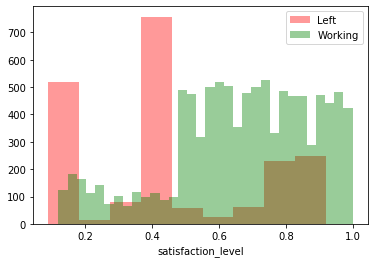

In [12]:
plt.figure()
sns.distplot(emp_left['satisfaction_level'], kde=False, color='red', label='Left')
sns.distplot(emp_working['satisfaction_level'], kde=False, color='green', label='Working')
plt.legend()
plt.show()

**Observations:**
- Majority of employees who left had low satisfaction levels
- Majority of employees who are working have relatively higher satisfaction levels
- This suggests that employees with lower satisfaction scores are more likely to leave

**2. Last evaluation scores of 'working' and 'left' employees**

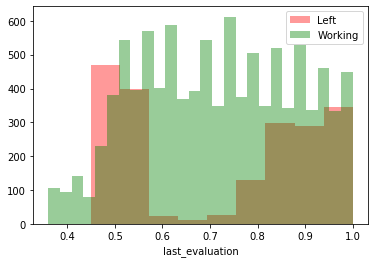

In [13]:
plt.figure()
sns.distplot(emp_left['last_evaluation'], kde=False, color='red', label='Left')
sns.distplot(emp_working['last_evaluation'], kde=False, color='green', label='Working')
plt.legend()
plt.show()

**Observation:**
- Employees who left, their last evaluation scores broadly fall into two categories - low , high

**3. No. of projects of per year of 'working' and 'left' employees**

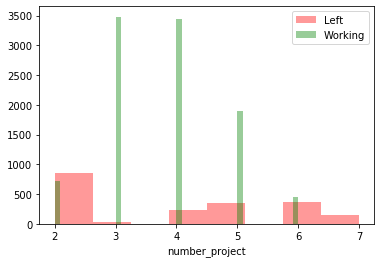

In [14]:
plt.figure()
sns.distplot(emp_left['number_project'], kde=False, color='red', label='Left')
sns.distplot(emp_working['number_project'], kde=False, color='green', label='Working')
plt.legend()
plt.show()

**4. Average monthly hours put in by 'working' and 'left' employees**

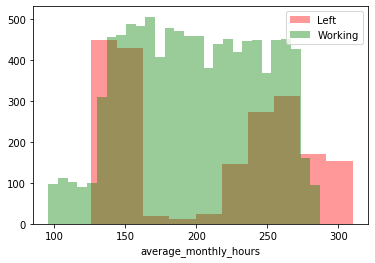

In [15]:
plt.figure()
sns.distplot(emp_left['average_monthly_hours'], kde=False, color='red', label='Left')
sns.distplot(emp_working['average_monthly_hours'], kde=False, color='green', label='Working')
plt.legend()
plt.show()

**Observations:**
- Average monthly hours for employees who left broadly fall into 2 groups - low and high. 
- 'left' group with low monthly hours indicates lack of effort which could be due to lack of motivation, disinterest or dissatisfaction which if not addressed leads to quitting.
- 'left' group with high monthly hours could have multiple reasons for leaving like lack of recognition, burnout, better opportunities. This needs to be explored further by discussions with such employees.

**5. Employment period for 'working' and 'left' employees**

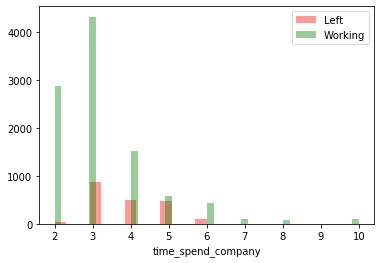

In [16]:
plt.figure()
sns.distplot(emp_left['time_spend_company'], kde=False, color='red', label='Left')
sns.distplot(emp_working['time_spend_company'], kde=False, color='green', label='Working')
plt.legend()
plt.show()

**Observations:**
- Attrition is higher in employees with 3-5 years employment period
- Lower attrition in higher ranges of employment period, 6 & above years and the lower range around 2 years

**6. Work accidents for 'working' and 'left' employees**

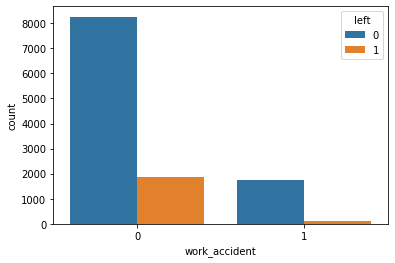

In [17]:
sns.countplot(x='work_accident',data=emp, hue='left')
plt.show()

**7. Absolute attrition across departments** 

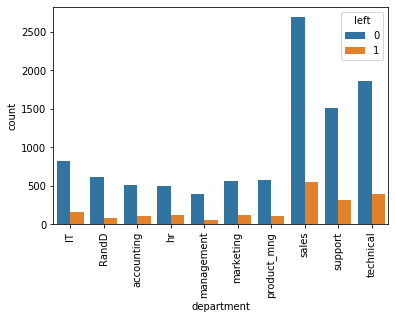

In [18]:
sns.countplot(x='department',data=emp, hue='left')
plt.xticks(rotation=90)
plt.show()

**Observation:**

Absolute attrition is higher in Sales, Support & Technical departments

**8. Percentage attrition across departments**

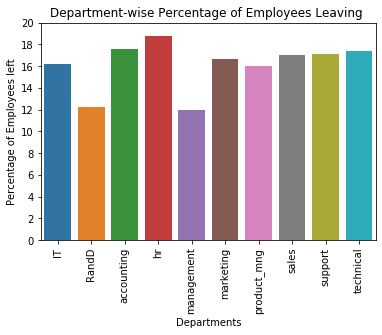

In [19]:
sns.barplot(x='department', y='left', data=emp, estimator=lambda x: sum(x==1)*100.0/len(x), ci=False)
plt.ylabel('Percentage of Employees left')
plt.xlabel('Departments')
plt.title('Department-wise Percentage of Employees Leaving ')
plt.xticks(rotation=90)
plt.yticks(ticks=range(0,21,2))
plt.show()

**Observation:**
- The attrition rate is around 12% in Management & RandD departments while for the rest it is between 16% to 19%.

**9. Percentatge employee attrition basis salary levels**

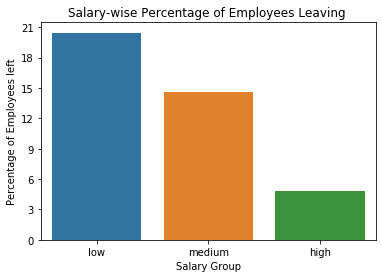

In [20]:
sns.barplot(x='salary', y='left', data=emp, estimator=lambda x: sum(x==1)*100.0/len(x), ci=False)
plt.ylabel('Percentage of Employees left')
plt.xlabel('Salary Group')
plt.title('Salary-wise Percentage of Employees Leaving ')
plt.yticks(ticks=range(0,22,3))
plt.show()

**Observations:**
- Low salary group has the highest attrition percentage, followed by medium and high salary group.
- At lower salary levels, the compensation plays a major role in an employee's decision to switch. As salary levels increase other factors like company culture, employee recognition, job role start to also come into decision making process in addition to salary. So at higher salary level it migh happen that a person is getting a better offer but he will not switch as he likes current company's culture.   

**10. Promotion in last 5 years for 'working' & 'left' employees**

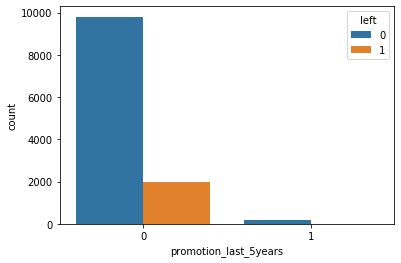

In [21]:
sns.countplot(x='promotion_last_5years',data=emp, hue='left')
plt.show()

**Observation:**

Almost none of the employees who left had promotion in last 5 years

# E. Checking significance of categorical features using Chi-Square Test

In [22]:
import scipy.stats as stats

for i in ['work_accident', 'department', 'salary', 'promotion_last_5years']:
    
    print('\n CHI SQUARE TEST OF INDEPENDENCE for ', i, ' and Employee Attrition')
    print('\n')
    print('Ho: ', i, ' and Employee Attrition are independent')
    print('Ha: ', i, ' and Employee Attrition are dependent \n')
    
    chi_test = stats.chi2_contingency(pd.crosstab(emp[i],emp['left']))
    print('Chi Square Statistic = ',chi_test[0])
    print('P-value = ',chi_test[1])
    print('D.O.F. = ',chi_test[2])
    print('Conclusion :')
    
    if chi_test[1]<0.01:
        print('\t Reject Ho')
        print('\t Hence, Employee Attrition is dependent on ', i)
        print('\t', i, ' should be considered as a predictor feature for Employee Attrition')
    else:
        print('\t Fail to Reject Ho')
        print('\t Hence, Employee attrition is not dependent on ', i)
        print('\t',i, 'should not be considered as a predictor feature for Employee Attrition')
    print ('\n ----------------------------------------------------------------------------------')


 CHI SQUARE TEST OF INDEPENDENCE for  work_accident  and Employee Attrition


Ho:  work_accident  and Employee Attrition are independent
Ha:  work_accident  and Employee Attrition are dependent 

Chi Square Statistic =  187.7378344525747
P-value =  9.911242628423175e-43
D.O.F. =  1
Conclusion :
	 Reject Ho
	 Hence, Employee Attrition is dependent on  work_accident
	 work_accident  should be considered as a predictor feature for Employee Attrition

 ----------------------------------------------------------------------------------

 CHI SQUARE TEST OF INDEPENDENCE for  department  and Employee Attrition


Ho:  department  and Employee Attrition are independent
Ha:  department  and Employee Attrition are dependent 

Chi Square Statistic =  20.857513153795892
P-value =  0.01329832963300122
D.O.F. =  9
Conclusion :
	 Fail to Reject Ho
	 Hence, Employee attrition is not dependent on  department
	 department should not be considered as a predictor feature for Employee Attrition

 ----------

**Observations:**
- 3 out of 4 categorical features have significant association with Employee Attrition
- Department doesnot have significant association with Employee Attrition

# F. Checking multi-collinearity in numerical features 

**Action to be taken:**

At every iteration, the feature with highest VIF score, if above 10, will be dropped, as it means that that feature is highly explained by a combination of the other features.

In [23]:
emp_num = emp[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(emp_num)

,variables,VIF
0,satisfaction_level,6.669769
1,last_evaluation,18.743123
2,number_project,13.524000
3,average_monthly_hours,17.882954
4,time_spend_company,7.043206


In [24]:
emp_num_2 = emp_num.drop('last_evaluation', axis=1)
calc_vif(emp_num_2)

,variables,VIF
0,satisfaction_level,5.762419
1,number_project,12.059074
2,average_monthly_hours,15.193876
3,time_spend_company,6.741651


In [25]:
emp_num_3 =  emp_num_2.drop('average_monthly_hours', axis=1)
calc_vif(emp_num_3)

,variables,VIF
0,satisfaction_level,4.686486
1,number_project,7.607831
2,time_spend_company,6.166896


**So, for modelling purposes below features will be dropped:**
- department (based on chi square test results)
- last_evaluation & average_monthly_hours (based on VIF Scores)

# G. Exploring clusters within 'left' employees to reveal deeper characteristics

### G1. Scaling the 'left employees' data before applying KMeans

In [26]:
# Dropping the 'department' column
emp_left_2 = emp_left.drop('department',axis=1)

# Label encoding the 'salary' column 
emp_left_2['salary'].replace({'low':1, 'medium':2, 'high':3}, inplace=True)

# Scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

emp_left_scaled = scaler.fit_transform(emp_left_2)
emp_left_scaled_df = pd.DataFrame(emp_left_scaled,columns=emp_left_2.columns)
emp_left_scaled_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.385542,0.018182,0.0,0.01087,0.25,0.0,0.0,0.0
1,0.409639,0.018182,0.0,0.00000,0.25,0.0,0.0,0.5


### G2. Visualising the data using PCA to explore possible number of clusters

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fitting PCA on Left Employee Data and transforming 
pca_output = pca.fit_transform(emp_left_scaled_df)

# Checking variance explained by 1st two components
pca.explained_variance_ratio_

array([0.55201521, 0.19435229])

The 1st two components explain ~75% variance.

In [28]:
# Converting PCA output to dataframe
pca_output_df=pd.DataFrame(pca_output)
pca_output_df.head(1)

,0,1
0,-0.775187,-0.034797


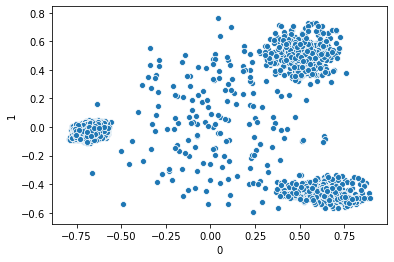

In [29]:
# Plotting the 1st two components to explore clusters in data
sns.scatterplot(x=0,y=1,data=pca_output_df)
plt.show()

**Observation :**

The above plot suggests **3 clusters** within the Left Employee data.

### G3. Verifying no. of clusters with KMeans elbow plot

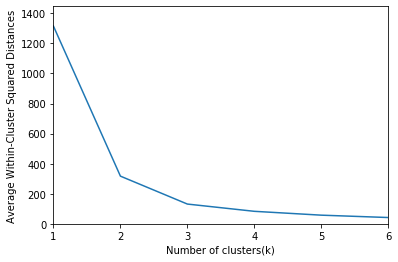

In [30]:
# Performing KMeans clustering with range of clusters 
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(emp_left_scaled_df)
    inertia.append(kmeans.inertia_ / n_clusters)
    
# Plotting Elbow Plot to determine number of clusters    
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()    

**After 3 clusters, there is very little decrease in Average Within-Cluster Squared Distances, hence 3 clusters should be formed as per Elbow Plot method**

### G4. Verifying number of clusters using Silhouette Score

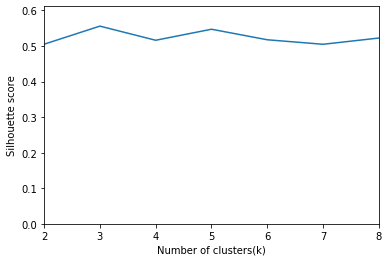

In [31]:
# Finding Silhouette Score for a range of clusters 
from sklearn.metrics import silhouette_score

sil_score=[]
for n_clusters in range(2,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(emp_left_scaled_df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(emp_left_scaled_df, preds)
    sil_score.append(score)

temp_df = pd.DataFrame({'n_cluster':range(2,9),'sil_score':sil_score})
ax = temp_df.plot(x='n_cluster', y='sil_score')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette score')
plt.ylim((0, 1.1 * temp_df.sil_score.max()))
ax.legend().set_visible(False)
plt.show() 
    

**Silhouette Score also suggests that 3 is a good number of clusters**

### G5. Final KMeans Clustering using 3 clusters

In [32]:
# Initialising KMeans model with k=3
kmeans = KMeans(n_clusters=3, random_state=0)

# Fitting KMeans to Left Employee data 
kmeans.fit(emp_left_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [33]:
# No. of records in each cluster
pd.Series(kmeans.labels_).value_counts()

0    889
1    557
2    545
dtype: int64

In [34]:
# Exploring cluster centroids to discover different characteristics
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=emp_left_scaled_df.columns)
centroids.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.388551,0.123837,0.019348,0.112841,0.255906,0.052868,0.006749,0.215973
1,0.854405,0.838812,0.503411,0.634289,0.765709,0.053860,0.001795,0.216338
2,0.034686,0.745955,0.830092,0.798963,0.518349,0.051376,0.001835,0.220183


**3 distinct groups among employees who leave**

- **The Dissatisfied Star** - Dedicated employee with highest work output in terms quantity, good work quality, but satisfaction level is low

- **The Satisfied Performer** - Dedicated employee with decent work output in terms quantity, good work quality, but satisfaction level is high

- **The Bored** - Lack of effort with poor work output in terms of both quality and quantity, coupled with low to moderate satisfaction levels.

### G6. Visualising clustering done by KMeans

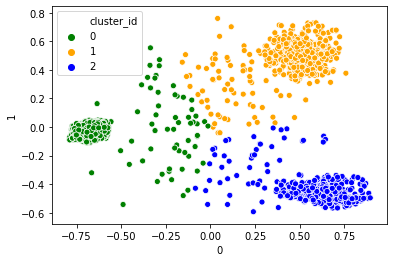

In [35]:
pca_output_df["cluster_id"] = kmeans.labels_
sns.scatterplot(x=0,y=1,data=pca_output_df,hue="cluster_id", palette={0:'green', 1:'orange', 2:'blue'})
plt.show()

**KMeans has successfully identified the 3 major clusters.**

# H. Preparing Data for Model Application

### H1. Removing the un-necessary columns found using VIF analysis and Chi-Square Test

In [36]:
emp_2=emp.drop(['department', 'last_evaluation', 'average_monthly_hours'], axis=1)
emp_2.head(2)

,satisfaction_level,number_project,time_spend_company,work_accident,promotion_last_5years,salary,left
0,0.41,2,3,0,0,low,1
1,0.65,4,4,0,0,low,0


### H2. Normalising the data

In [37]:
# Label encoding the 'salary' column 
emp_2['salary'].replace({'low':1, 'medium':2, 'high':3}, inplace=True)

# Normalising using Min-Max scaler (outcome feature has binary values 0, 1 so they will remain same, hence no need to separate it )
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

emp_scaled = scaler.fit_transform(emp_2)
emp_scaled_df = pd.DataFrame(emp_scaled,columns=emp_2.columns)
emp_scaled_df.head()

,satisfaction_level,number_project,time_spend_company,work_accident,promotion_last_5years,salary,left
0,0.351648,0.0,0.125,0.0,0.0,0.0,1.0
1,0.615385,0.4,0.250,0.0,0.0,0.0,0.0
2,0.934066,0.2,0.125,0.0,0.0,1.0,0.0
3,0.912088,0.4,0.250,0.0,0.0,0.5,0.0
4,0.373626,0.0,0.125,0.0,0.0,0.5,1.0


### H3. Splitting data in train & test sets

In [38]:
# splitting data into test and train set

X = emp_scaled_df.drop('left',axis=1)
y = emp_scaled_df['left']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### H4. Dealing with imbalance in the outcome class:

**Actions to take when dealing with dataset with imbalanced classes:**

1. **Select performance metrics, such as those that focus on the minority class** 
   - In our case FNs (False Negative i.e. employee going to leave but models predicts 'not going to leave') has a high cost, therefore we will use Recall as the performance metric for the models.
   - In cases where FPs (False Positives) have a high cost, Precision is a better metric.
    
    
2. **Select data preparation methods that attempt to re-balance the classes**
    * Undersample Majority Class : Creates information loss, used only if data set is very huge
    * Random Oversampling Minority Class : Duplicates minority class data, hence can create overfitting
    * SMOTE-Synthetic minority oversampling technique : Using nearest neighbors, creates synthesized minority data points
    
    We will using **Random Oversampling** and **SMOTE** and evaluate model performance in each case.

# I. KNN Model

## I1. KNN with original imbalanced data

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

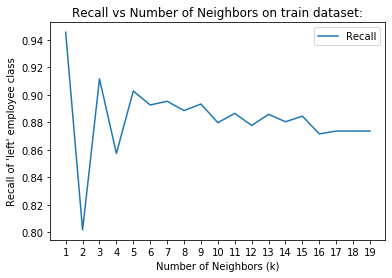

In [40]:
# visualising recalls for different n_neighbors on training set

recall_list = [] #to store "recall" values for different k
for K in range(1,20):
    
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_train) #make prediction on test set
    cm = confusion_matrix(y_train,pred)
    recall = (cm[1,1]/(cm[1,0]+cm[1,1]))
    recall_list.append(recall) #store recall values
    
curve = pd.DataFrame(recall_list) 
sns.lineplot(x=range(1,20),y = curve.iloc[:,0],label='Recall')
plt.xticks(range(1,20))
plt.title('Recall vs Number of Neighbors on train dataset:')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel("Recall of 'left' employee class")
plt.legend()
plt.show()

**Observation:** - At k = 1, recall for 'left' employees is the highest, but k=1 can be prone to noise and outliers, hence the next best k, which is 3 should be selected for final model building

In [41]:
# Specifying knn hyperparameters to find best combination using Grid Search with CV 
params = {'n_neighbors': range(2,10),'weights': ['uniform','distance'], 'p' : [1,2,3]}

# Using Grid Search with Cross Validation to find best hyperparameters
grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_grid = params, scoring = 'recall', cv=5)
grid_search_cv.fit(X_train, y_train)

# Best hyperparameters for knn model found by Grid Search
grid_search_cv.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

**Observation:** - Both recall vs number of neighbors plot and Grid Search suggest that k value should be 3

In [42]:
# Cross validated Recall score of best knn model on original training data
grid_search_cv.best_score_

0.8885967946500635

In [43]:
# best knn model
best_knn= grid_search_cv.best_estimator_

# make prediction on test set using best knn model
knn_pred = best_knn.predict(X_test) 
knn_cm = confusion_matrix(y_test,knn_pred)
print(knn_cm)
print('\n')
print(classification_report(y_test,knn_pred))

[[2432   47]
 [  56  463]]


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2479
         1.0       0.91      0.89      0.90       519

    accuracy                           0.97      2998
   macro avg       0.94      0.94      0.94      2998
weighted avg       0.97      0.97      0.97      2998



## I2. KNN with SMOTE data

In [44]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import StratifiedKFold

# We will perform  5-Fold Stratified K-Fold CV
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Specifying knn hyperparameters to find best combination using Grid Search with CV 
params = {'n_neighbors': range(2,10),'weights': ['uniform','distance'], 'p' : [1,2,3]}
new_params = {'kneighborsclassifier__' + key: params[key] for key in params}
new_params

{'kneighborsclassifier__n_neighbors': range(2, 10),
 'kneighborsclassifier__weights': ['uniform', 'distance'],
 'kneighborsclassifier__p': [1, 2, 3]}

In [46]:
from imblearn.over_sampling import SMOTE


# Making a pipleline of SMOTE and knn model to use inside Grid Search
imba_pipeline_sm = make_pipeline(SMOTE(random_state=42), KNeighborsClassifier())

# Using Grid Search with Cross Validation to find best hyperparameters
grid_imba_sm = GridSearchCV(imba_pipeline_sm, param_grid=new_params, cv=kf, scoring='recall',return_train_score=True)

# Running GridSearchCV using training data
grid_imba_sm.fit(X_train, y_train);

# The best hyperparameters for knn found by Grid Search
grid_imba_sm.best_params_

{'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__p': 3,
 'kneighborsclassifier__weights': 'uniform'}

In [47]:
# Best knn model
knn_sm = grid_imba_sm.best_estimator_

# Cross validated Recall score of best knn model on training data (synthetic)
print('Cross Validated Recall Score on Trg set: ',grid_imba_sm.best_score_)

Cross Validated Recall Score on Trg set:  0.9198593335639341


In [48]:
# Performance of best knn model on test set
y_test_predict = grid_imba_sm.best_estimator_.named_steps['kneighborsclassifier'].predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2479
         1.0       0.79      0.92      0.85       519

    accuracy                           0.94      2998
   macro avg       0.88      0.94      0.91      2998
weighted avg       0.95      0.94      0.95      2998



## I3. KNN with Random Oversampled data:

In [49]:
from imblearn.over_sampling import RandomOverSampler

# Making a pipleline of SMOTE and knn model to use inside Grid Search
imba_pipeline_os = make_pipeline(RandomOverSampler(sampling_strategy=0.75, random_state=42), KNeighborsClassifier())

# Specifying Grid Search with Cross Validation
grid_imba_os = GridSearchCV(imba_pipeline_os, param_grid=new_params, cv=kf, scoring='recall',return_train_score=True)

# Running GridSearchCV using training data
grid_imba_os.fit(X_train, y_train);

# The best hyperparameters for the knn model found by Grid Search
grid_imba_os.best_params_


{'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [50]:
# Best knn model
knn_os = grid_imba_os.best_estimator_

# Cross validated Recall score of best knn model on training data (oversampled)
print('Cross Validated Recall Score on Trg set: ',grid_imba_os.best_score_)

Cross Validated Recall Score on Trg set:  0.923924824166955


In [51]:
# Performance of best knn model on test set
y_test_predict = grid_imba_os.best_estimator_.named_steps['kneighborsclassifier'].predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2479
         1.0       0.80      0.92      0.85       519

    accuracy                           0.94      2998
   macro avg       0.89      0.93      0.91      2998
weighted avg       0.95      0.94      0.95      2998



# J. Decision Model

## J1. DT with original data

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Specifying Decison Tree hyperparameters to find best combination using Grid Search with CV 
params = {'max_depth': [1,2,3,4,5,6], 'min_samples_split' : [0.05,0.1,0.2,0.3,0.4,0.5],'criterion' : ["gini", "entropy"]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid = params, scoring = 'recall', cv=5)
grid_search_cv.fit(X_train, y_train)

DT = grid_search_cv.best_estimator_
DT_pred = DT.predict(X_test) #make prediction on test set
DT_cm = confusion_matrix(y_test,DT_pred)
print(DT_cm)
print('\n')
print(classification_report(y_test,DT_pred))

[[2332  147]
 [  44  475]]


              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      2479
         1.0       0.76      0.92      0.83       519

    accuracy                           0.94      2998
   macro avg       0.87      0.93      0.90      2998
weighted avg       0.94      0.94      0.94      2998



In [53]:
# The best hyperparameters for Decision Tree found by Grid Search
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=0.1, random_state=42)

In [54]:
# Cross validated Recall score of best Decision Tree on training data (original)
print('Cross Validated Recall Score on Trg set: ',grid_search_cv.best_score_)

Cross Validated Recall Score on Trg set:  0.928001844805719


## J2. DT with SMOTE data

In [55]:

# We will perform  5-Fold Stratified K-Fold CV
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Specifying Decison Tree hyperparameters to find best combination using Grid Search with CV 
params = {'max_depth': [1,2,3,4,5,6], 'min_samples_split' : [0.05,0.1,0.2,0.3,0.4,0.5],'criterion' : ["gini", "entropy"]}
new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}
new_params

{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6],
 'decisiontreeclassifier__min_samples_split': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
 'decisiontreeclassifier__criterion': ['gini', 'entropy']}

In [56]:
# Making a pipleline of SMOTE and Decision Tree model to use inside Grid Search
imba_pipeline_sm = make_pipeline(SMOTE(random_state=42), DecisionTreeClassifier())

# Specifying Grid Search with Cross Validation
grid_imba_sm = GridSearchCV(imba_pipeline_sm, param_grid=new_params, cv=kf, scoring='recall',return_train_score=True)

# Running GridSearchCV using training data
grid_imba_sm.fit(X_train, y_train);

# The best hyperparameters for Decision Tree found by Grid Search
grid_imba_sm.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 2,
 'decisiontreeclassifier__min_samples_split': 0.5}

In [57]:
# Best Decision Tree
DT_sm = grid_imba_sm.best_estimator_

# Cross validated Recall score of best Decision Tree on training data (synthetic)
print('Cross Validated Recall Score on Trg set: ',grid_imba_sm.best_score_)

Cross Validated Recall Score on Trg set:  0.96604173872939


In [58]:
# Performance of best Decison Tree model on test set
y_test_predict = grid_imba_sm.best_estimator_.named_steps['decisiontreeclassifier'].predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      2479
         1.0       0.47      0.96      0.63       519

    accuracy                           0.81      2998
   macro avg       0.73      0.87      0.75      2998
weighted avg       0.90      0.81      0.83      2998



## J3. DT with Random oversampling data

In [59]:
# Making a pipleline of SMOTE and Random Forest model to use inside Grid Search
imba_pipeline_os = make_pipeline(RandomOverSampler(sampling_strategy=0.75, random_state=42), DecisionTreeClassifier())

# Specifying Grid Search with Cross Validation
grid_imba_os = GridSearchCV(imba_pipeline_os, param_grid=new_params, cv=kf, scoring='recall',return_train_score=True)

# Running GridSearchCV using training data
grid_imba_os.fit(X_train, y_train);

# The best hyperparameters for the Decision Tree found by Grid Search
grid_imba_os.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 2,
 'decisiontreeclassifier__min_samples_split': 0.4}

In [60]:
# Best Decision Tree 
DT_os = grid_imba_os.best_estimator_

# Cross validated Recall score of best Decision Tree on training data (oversampled)
print('Cross Validated Recall Score on Trg set: ',grid_imba_os.best_score_)

Cross Validated Recall Score on Trg set:  0.96604173872939


In [61]:
# Performance of best Decison Tree model on test set
y_test_predict = grid_imba_os.best_estimator_.named_steps['decisiontreeclassifier'].predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      2479
         1.0       0.47      0.96      0.63       519

    accuracy                           0.81      2998
   macro avg       0.73      0.87      0.75      2998
weighted avg       0.90      0.81      0.83      2998



## J4. Feature Importance - Decision Tree

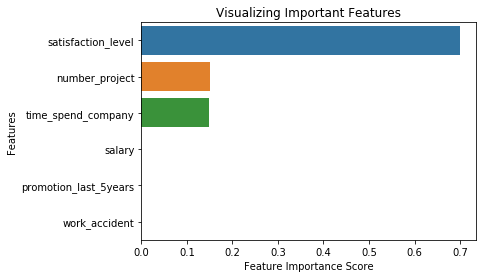

In [62]:
# checking feature importance score in decision tree model with original imbalance classes data

feature_imp = pd.Series(DT.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

# K. Random Forest Model

## K1. Random Forest with original data

In [63]:
from sklearn.ensemble import RandomForestClassifier as RFC

# Specifying Random Forest hyperparameters to find best combination using Grid Search with CV 
params = {'n_estimators': [50, 100, 200],'max_depth': [1,3,5,6],'max_features': [2,3,4,5,6],'random_state': [13]}

grid_search_cv = GridSearchCV(RFC(random_state=42), param_grid = params, scoring = 'recall', cv=5)
grid_search_cv.fit(X_train, y_train)

RF = grid_search_cv.best_estimator_
RF_pred = RF.predict(X_test) #make prediction on test set
RF_cm = confusion_matrix(y_test,RF_pred)
print(RF_cm)
print('\n')
print(classification_report(y_test,RF_pred))

[[2433   46]
 [  47  472]]


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2479
         1.0       0.91      0.91      0.91       519

    accuracy                           0.97      2998
   macro avg       0.95      0.95      0.95      2998
weighted avg       0.97      0.97      0.97      2998



In [64]:
# The best hyperparameters for Random Forest found by Grid Search
grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=5, max_features=6, n_estimators=50,
                       random_state=13)

In [65]:
# Recall score of best Random Forest on training data (original)
print('Cross Validated Recall Score on Trg set: ',grid_search_cv.best_score_)

Cross Validated Recall Score on Trg set:  0.919169837426496


## K2. Random Forest using SMOTE dataset

In [66]:
from sklearn.ensemble import RandomForestClassifier

# We will perform  5-Fold Stratified K-Fold CV
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Specifying Random Forest hyperparameters to find best combination using Grid Search with CV 
params = {'n_estimators': [50, 100, 200],'max_depth': [1,3,5,6],'max_features': [2,3,4,5,6],'random_state': [13]}
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
new_params

{'randomforestclassifier__n_estimators': [50, 100, 200],
 'randomforestclassifier__max_depth': [1, 3, 5, 6],
 'randomforestclassifier__max_features': [2, 3, 4, 5, 6],
 'randomforestclassifier__random_state': [13]}

In [67]:
# Making a pipleline of SMOTE and Random Forest model to use inside Grid Search
imba_pipeline_sm = make_pipeline(SMOTE(random_state=42), RandomForestClassifier())

# Specifying Grid Search with Cross Validation
grid_imba_sm = GridSearchCV(imba_pipeline_sm, param_grid=new_params, cv=kf, scoring='recall',return_train_score=True)

# Running GridSearchCV using training data
grid_imba_sm.fit(X_train, y_train);

# The best hyperparameters for the Random Forest (synthetic data)
grid_imba_sm.best_params_

{'randomforestclassifier__max_depth': 3,
 'randomforestclassifier__max_features': 6,
 'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__random_state': 13}

In [68]:
# Best estimator using SMOTE
RF_sm = grid_imba_sm.best_estimator_

# Recall score of best Random Forest on training data (synthetic)
print('Cross Validated Recall Score on Trg set: ',grid_imba_sm.best_score_)

Cross Validated Recall Score on Trg set:  0.9497451862100773


In [69]:
# Performance of best Random Forest model on test set
y_test_predict = grid_imba_sm.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2479
         1.0       0.62      0.94      0.75       519

    accuracy                           0.89      2998
   macro avg       0.80      0.91      0.84      2998
weighted avg       0.92      0.89      0.90      2998



## K3. Random Forest using random oversampled dataset

In [70]:
# Making a pipleline of Random Oversampler and Random Forest model to use inside Grid Search
imba_pipeline_os = make_pipeline(RandomOverSampler(sampling_strategy=0.75, random_state=42), RandomForestClassifier())

# Specifying Grid Search with Cross Validation
grid_imba_os = GridSearchCV(imba_pipeline_os, param_grid=new_params, cv=kf, scoring='recall',return_train_score=True)

# Running GridSearchCV using training data
grid_imba_os.fit(X_train, y_train);

# The best hyperparameters for the Random Forest (trained using Oversampled data)
grid_imba_os.best_params_

{'randomforestclassifier__max_depth': 3,
 'randomforestclassifier__max_features': 5,
 'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__random_state': 13}

In [71]:
# Best estimator using Random Oversampling
RF_os = grid_imba_os.best_estimator_

# Recall score of best Random Forest on training data (oversampled)
print('Cross Validated Recall Score on Trg set: ', grid_imba_os.best_score_)

Cross Validated Recall Score on Trg set:  0.9429516891502363


In [72]:
# Performance of best Random Forest model on test set
y_test_predict = grid_imba_os.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2479
         1.0       0.64      0.93      0.75       519

    accuracy                           0.90      2998
   macro avg       0.81      0.91      0.84      2998
weighted avg       0.92      0.90      0.90      2998



## K4. Feature Importance - Random Forest

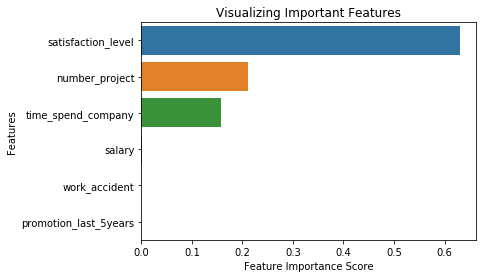

In [73]:
# checking feature importance score in random forest model with original imbalance classes data

feature_imp = pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

# L. Model Selection :

In [74]:
model = ['knn', 'knn_sm', 'knn_os', 'DT', 'DT_sm', 'DT_os', 'RF', 'RF_sm', 'RF_os']
left_recall_trgsetCV =[0.888, 0.919, 0.923, 0.928, 0.966 , 0.966, 0.919, 0.949, 0.942]
left_recall_testset = [0.89, 0.92, 0.92, 0.92,0.96 , 0.96, 0.91, 0.94, 0.93]
working_recall_testset = [0.98, 0.95, 0.95, 0.94, 0.78,0.78,0.98, 0.88,0.89]
model_outcome = pd.DataFrame({'model':model, 'left_recall_trgsetCV':left_recall_trgsetCV, 'left_recall_testset' : left_recall_testset, 'working_recall_testset':working_recall_testset})
model_outcome

,model,left_recall_trgsetCV,left_recall_testset,working_recall_testset
0,knn,0.888,0.89,0.98
1,knn_sm,0.919,0.92,0.95
2,knn_os,0.923,0.92,0.95
3,DT,0.928,0.92,0.94
4,DT_sm,0.966,0.96,0.78
5,DT_os,0.966,0.96,0.78
6,RF,0.919,0.91,0.98
7,RF_sm,0.949,0.94,0.88
8,RF_os,0.942,0.93,0.89


* If company is aggresive about retaining employees then **DT with SMOTE** model should be chosen. It is classyfying those who are likely to  leave 96% correctly,however it is misclassyfying those employees who will actually not leave in larger number (only 78% correct). So in this case the retention efforts of the company will also apply to considerable number of employees who are actually not going to leave leading to higher effort from HR department and higher cost.


* If company wants to retain employees however budget as well as bandwidth of HR department is restricted, then **RF** model can be chosen. It is classifying those who are likely to  leave 91% correctly while those who are not likely to leave are classified 98% correctly.

# M. Conclusion 

### 1. Features impacting attrition

- **1. Satisfaction Level** - Majority of employees who left had low satisfaction levels while Majority of employees who are working have relatively higher satisfaction levels. This suggests that employees with lower satisfaction scores are more likely to leave.

- **2. Last Evaluation Score** - High attrition observed in employees with last evaluation scores either in the lower range or in the higher range but not in the mid range.

- **3. Average Monthly Hours** - High attrition observed in employees with average monthly hours either in the lower range or in the higher range but not in the mid range. Low monthly hours indicate lack of effort which could be due to lack of motivation, disinterest or dissatisfaction which if not addressed leads to quitting. Attrition with high monthly hours could have multiple reasons for leaving like lack of recognition, burnout, better opportunities. This needs to be explored further by discussions with such employees. 

- **4. Salary** - Highest attrition rate in employees in low salary group followed by medium and high salary groups. At lower salary levels, the compensation plays a major role in an employee's decision to switch. As salary levels increase other factors like company culture, employee recognition, job role start to also come into decision making process in addition to salary. So at higher salary level it migh happen that a person is getting a better offer but he will not switch as he like's current company's culture.

- **5. Time Spent in Company** - Attrition is higher in employees with 3-5 years employment period. Lower attrition in higher ranges of employment period, 6 & above years and the lower range around 2 years. 

- **6. Work accidents**

- **7. No. of projects** - None of the employees who left had a promotion in last 5 years.

- **8. Promotion in last 5 years**

### 2. Features not impacting attrition
Department of the employee doesnot have significant impact on attrition. The attrition rate is around 12% in Management & HR departments while for the rest it is between 16% to 19%.

### 3. Three distinct groups of employees who are likely to leave

**The Dissatisfied Star** - Dedicated employee with highest work output in terms quantity, good work quality, but satisfaction level is very low

**The Satisfied Performer** - Dedicated employee with decent work output in terms quantity, good work quality, but satisfaction level is high

**The Bored One** - Lack of effort with poor work output in terms of both quality and quantity, coupled with low to moderate satisfaction levels.



### 4. Way forward

1. Identify the employees who are likely to leave by using proposed machine learning models

2. Identify which of the 3 groups do they fall into.

3. Prioritize the HR intervention basis employee position. Usually the cost of recruitment increases with the seniority, skills and experience required. So focus HR efforts accordingly. (Ideal would be to adress all cases if possible).

4. For the shortlisted employees / positions, further investigate the potential causes of attrition by holding discusiions with employee as well as the reporting manager and then address the same. Overtime some standard approaches would develop for each group. But at the same time there has to be room for specific interventions as each employees falling in same group could have different motivation & issues.

5. The machine learning models are not static. New data needs to be fed into it periodically so that it stays relevant.
 

# END OF FILE